# Timing Python code

In [149]:
def f(n):
    a = 0
    for i in range(100_000 * n):
        a += i
    return a

In [150]:
%time f(30)

CPU times: user 172 ms, sys: 2.21 ms, total: 174 ms
Wall time: 173 ms


4499998500000

In [210]:
# also demos use of varargs!
import time
def gettime(f, *args):
    "Return time in seconds; %time, %timeit don't work in functions so we write our own"
    t0 = time.time()
    f(*args)
    t1 = time.time()
    return t1 - t0

In [196]:
t = gettime(f, 30) # call f(5)
print(f"{t:.3f}s")

0.168s


## Profiling

In [152]:
%prun f(30)

         4 function calls in 0.157 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.157    0.157    0.157    0.157 <ipython-input-149-7c5abab19a91>:1(f)
        1    0.000    0.000    0.157    0.157 {built-in method builtins.exec}
        1    0.000    0.000    0.157    0.157 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Plotting time vs work

In [251]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # png sucks
def showtime(f, n, step=1):
    times = [gettime(f, i) for i in range(1,n,step)]
    plt.plot(range(1,n,step), times, '.', color='#fdae61', alpha=.9, markersize=15, markeredgewidth=.5, markeredgecolor='black')
    plt.xlabel("Problem size")
    plt.ylabel("Time in seconds")
    plt.show()

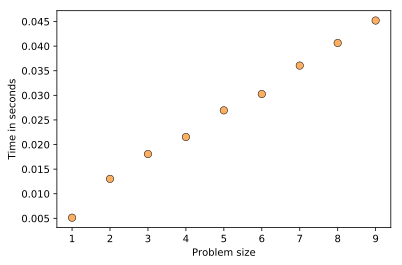

In [252]:
showtime(f,10)

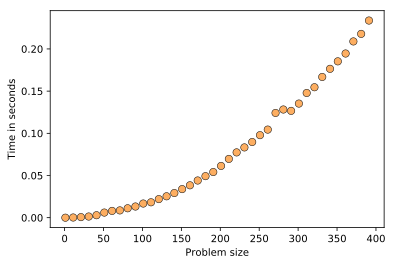

In [267]:
def g(n):
    a = 0
    for i in range(10*n):
        zeroes = [0 for j in range(i)]
        a += len(zeroes)
    return a

showtime(g,400,step=10)

# Misc

In [62]:
# Define macro %mytime to run something once and return a TimeitResult object
%alias_magic mytime --line timeit -p "-q -o -n 1 -r 1"

Created `%mytime` as an alias for `%timeit -q -o -n 1 -r 1`.


In [286]:
def log2(n):
    if n <= 1:
        return 0
    count = 0
    while n > 0:
        n = int(n / 2)
        count += 1
    return count-1
print( log2(2) )

1
